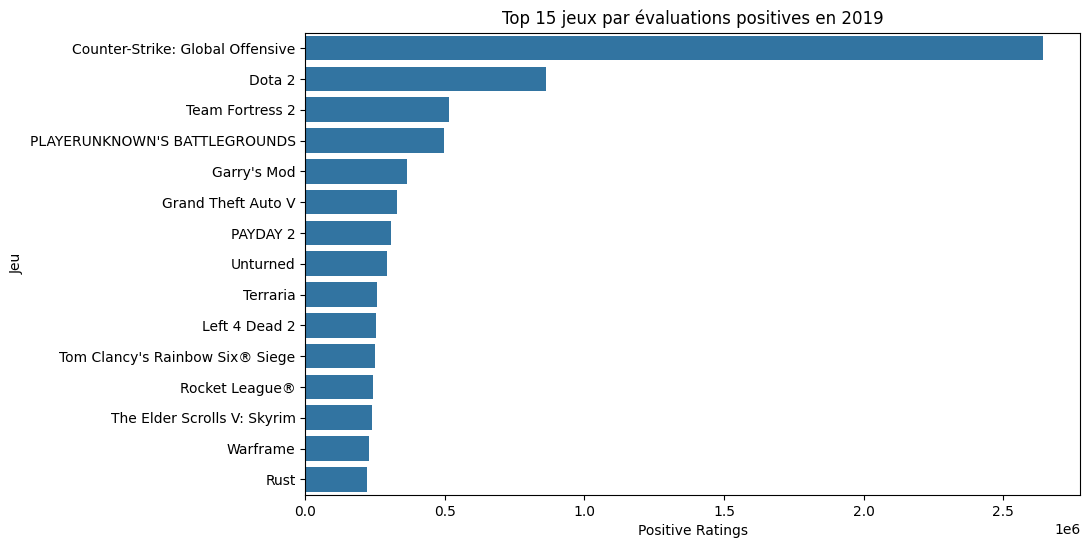

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('steam.csv')

top15 = df.sort_values("positive_ratings", ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(y=top15["name"], x=top15["positive_ratings"])
plt.title("Top 15 jeux par évaluations positives en 2019")
plt.xlabel("Positive Ratings")
plt.ylabel("Jeu")
plt.show()


### Interprétation

- **Counter-Strike: Global Offensive (CS:GO)** domine largement avec plus de *2.5 millions* de votes positifs, bien au-dessus des autres jeux.  
- Les jeux **gratuits et compétitifs multijoueurs** (CS:GO, Dota 2, Team Fortress 2, Unturned) attirent une communauté massive.  
- Les **blockbusters premium** comme *GTA V* ou *PUBG* apparaissent aussi dans le classement, mais restent loin derrière en volume total.  


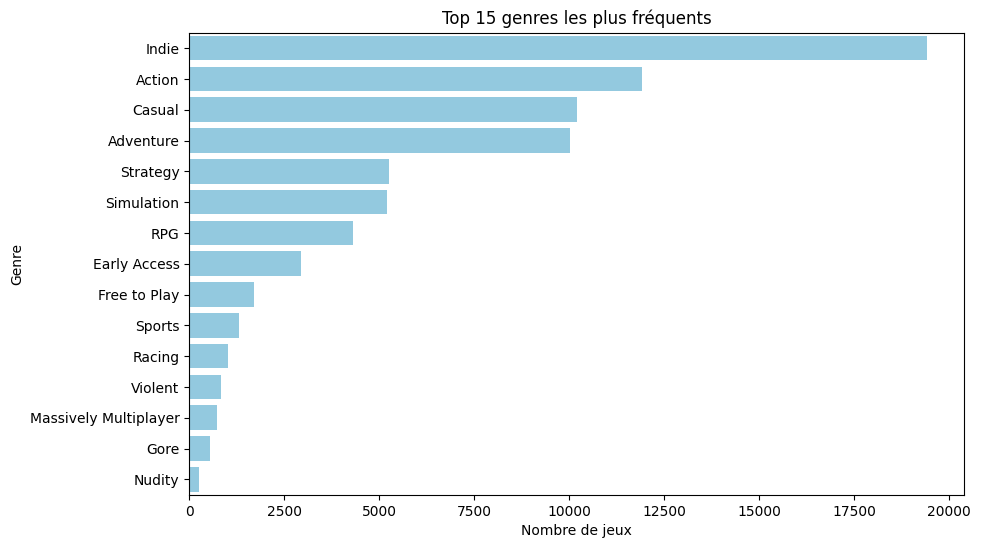

In [24]:
genre_counts = df["genres"].str.split(";").explode().value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, color="skyblue")
plt.title("Top 15 genres les plus fréquents")
plt.xlabel("Nombre de jeux")
plt.ylabel("Genre")
plt.show()


### Interprétation

- Le genre **Indie** domine largement avec près de 20 000 jeux, confirmant la place centrale des studios indépendants sur Steam.  
- Les genres **Action, Casual et Adventure** forment le deuxième groupe le plus représenté (~10–12k titres chacun).  
- Des genres plus spécialisés comme **Strategy, Simulation et RPG** restent bien présents (4–6k jeux).  
- On observe aussi des catégories particulières (**Early Access, Free to Play**) qui montrent la spécificité du modèle économique de Steam.  


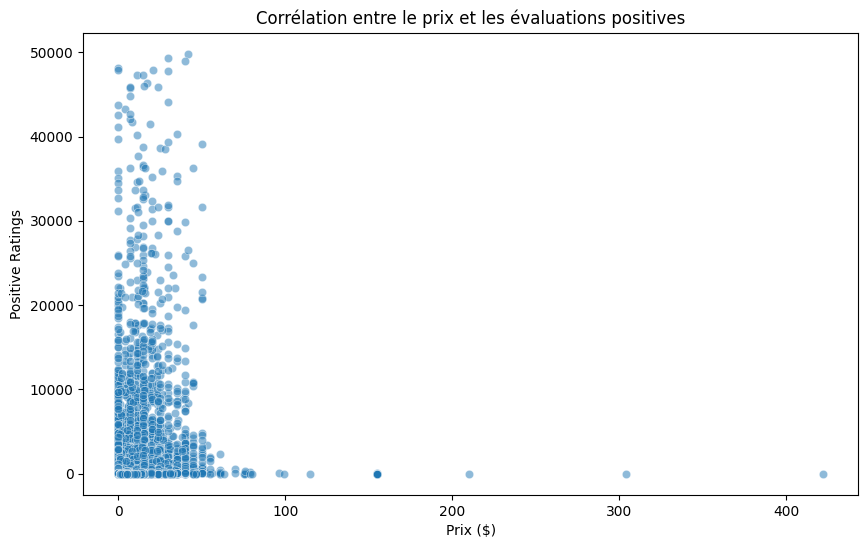

In [44]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("steam.csv")

connexion = sqlite3.connect(":memory:")

# Charger le DataFrame dans une table SQL
df.to_sql("steam", connexion, index=False, if_exists="replace")

query = """
SELECT price, positive_ratings
FROM steam
WHERE price IS NOT NULL
  AND positive_ratings IS NOT NULL
  AND positive_ratings < 50000
"""
result = pd.read_sql_query(query, connexion)

plt.figure(figsize=(10,6))
sns.scatterplot(data=result, x="price", y="positive_ratings", alpha=0.5)
plt.title("Corrélation entre le prix et les évaluations positives")
plt.xlabel("Prix ($)")
plt.ylabel("Positive Ratings")
plt.show()


### Interprétation

- La majorité des jeux se situent entre **0 et 20$**, avec une forte concentration de jeux gratuits.  
- Les jeux **free-to-play** obtiennent souvent le plus grand nombre de votes positifs (ex: CS:GO, Dota 2).  
- Les jeux premium (~30–60$) peuvent aussi avoir beaucoup d’évaluations, mais leur succès dépend plus de la notoriété que du prix.  
- Les titres très chers (>200$) sont des cas rares, souvent peu évalués.  
